In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df_0 = pd.read_csv('./data/prices_round_3_day_0.csv', sep=';')
df_1 = pd.read_csv('./data/prices_round_3_day_1.csv', sep=';')
df_2 = pd.read_csv('./data/prices_round_3_day_2.csv', sep=';')
df_3 = pd.read_csv('../round 5/data/prices_round_5_day_3.csv', sep=';')
df_4 = pd.read_csv('../round 5/data/prices_round_5_day_4.csv', sep=';')
df_trades_0 = pd.read_csv('./data/trades_round_3_day_0.csv', sep=';')
df_trades_1 = pd.read_csv('./data/trades_round_3_day_1.csv', sep=';')
df_trades_2 = pd.read_csv('./data/trades_round_3_day_2.csv', sep=';')

In [3]:
df = pd.concat([df_0, df_1, df_2, df_3, df_4])
df_trades_1.loc[:, 'timestamp'] = df_trades_1.apply(lambda x: x['timestamp'] + 1000000, axis=1)
df_trades_2.loc[:, 'timestamp'] = df_trades_2.apply(lambda x: x['timestamp'] + 2000000, axis=1)
df_trades = pd.concat([df_trades_0, df_trades_1, df_trades_2])

In [4]:
CST = 'CROISSANTS'
JAM = 'JAMS'
DJE = 'DJEMBES'
SQI = 'SQUID_INK'
KLP = 'KELP'
RAR = 'RAINFOREST_RESIN'
PB1 = 'PICNIC_BASKET1'
PB2 = 'PICNIC_BASKET2'
VOR = 'VOLCANIC_ROCK'
VOR_C9500 = 'VOLCANIC_ROCK_VOUCHER_9500'
VOR_C9750 = 'VOLCANIC_ROCK_VOUCHER_9750'
VOR_C10000 = 'VOLCANIC_ROCK_VOUCHER_10000'
VOR_C10250 = 'VOLCANIC_ROCK_VOUCHER_10250'
VOR_C10500 = 'VOLCANIC_ROCK_VOUCHER_10500'

products = [CST, JAM, DJE, SQI, KLP, RAR, PB1, PB2, \
            VOR, VOR_C9500, VOR_C9750, VOR_C10000, VOR_C10250, VOR_C10500]
coupons = [VOR_C9500, VOR_C9750, VOR_C10000, VOR_C10250, VOR_C10500]
strikes = {VOR_C9500: 9500, \
            VOR_C9750: 9750, \
            VOR_C10000: 10000, \
            VOR_C10250: 10250, \
            VOR_C10500: 10500}

In [5]:
data = {}
indices = list(range(50000))
for product in products:
    data[product] = df[df['product'] == product]
    data[product].loc[:, 'timestamp'] = data[product].apply(lambda x: x['day'] * 1000000 + x['timestamp'], axis=1)
    data[product].loc[:, 'index'] = data[product].apply(lambda x: x['timestamp'] // 100, axis=1)
    data[product].set_index(['index'], inplace=True)
    data[product].drop(['day', 'product'], axis=1, inplace=True)

C:\Users\Alex\AppData\Local\Temp\ipykernel_18348\3258300517.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[product].loc[:, 'index'] = data[product].apply(lambda x: x['timestamp'] // 100, axis=1)
C:\Users\Alex\AppData\Local\Temp\ipykernel_18348\3258300517.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[product].drop(['day', 'product'], axis=1, inplace=True)
C:\Users\Alex\AppData\Local\Temp\ipykernel_18348\3258300517.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

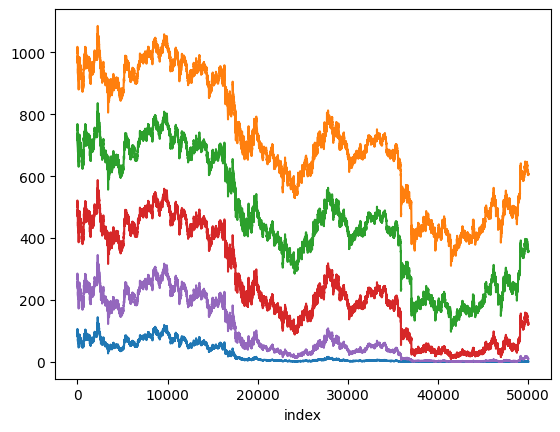

In [6]:
fig, ax = plt.subplots()
for product in {VOR_C9500, VOR_C9750, VOR_C10000, VOR_C10250, VOR_C10500}:
    data[product]['mid_price'].plot(ax=ax)

In [9]:
# the naive strategy of pairs trade for the most obvious arbitrage doesn't seem to work...
# but I mean if you can manage to pick up some coupons for cheap WHILE the arb signal appears, that's golden
# so maybe still worth a try?
for u in coupons:
    for v in coupons:
        arb = abs(data[u]['mid_price'] - data[v]['mid_price']) > abs(strikes[u] - strikes[v])
        print(u, v, arb.sum())

VOLCANIC_ROCK_VOUCHER_9500 VOLCANIC_ROCK_VOUCHER_9500 0
VOLCANIC_ROCK_VOUCHER_9500 VOLCANIC_ROCK_VOUCHER_9750 11
VOLCANIC_ROCK_VOUCHER_9500 VOLCANIC_ROCK_VOUCHER_10000 0
VOLCANIC_ROCK_VOUCHER_9500 VOLCANIC_ROCK_VOUCHER_10250 0
VOLCANIC_ROCK_VOUCHER_9500 VOLCANIC_ROCK_VOUCHER_10500 0
VOLCANIC_ROCK_VOUCHER_9750 VOLCANIC_ROCK_VOUCHER_9500 11
VOLCANIC_ROCK_VOUCHER_9750 VOLCANIC_ROCK_VOUCHER_9750 0
VOLCANIC_ROCK_VOUCHER_9750 VOLCANIC_ROCK_VOUCHER_10000 0
VOLCANIC_ROCK_VOUCHER_9750 VOLCANIC_ROCK_VOUCHER_10250 0
VOLCANIC_ROCK_VOUCHER_9750 VOLCANIC_ROCK_VOUCHER_10500 0
VOLCANIC_ROCK_VOUCHER_10000 VOLCANIC_ROCK_VOUCHER_9500 0
VOLCANIC_ROCK_VOUCHER_10000 VOLCANIC_ROCK_VOUCHER_9750 0
VOLCANIC_ROCK_VOUCHER_10000 VOLCANIC_ROCK_VOUCHER_10000 0
VOLCANIC_ROCK_VOUCHER_10000 VOLCANIC_ROCK_VOUCHER_10250 0
VOLCANIC_ROCK_VOUCHER_10000 VOLCANIC_ROCK_VOUCHER_10500 0
VOLCANIC_ROCK_VOUCHER_10250 VOLCANIC_ROCK_VOUCHER_9500 0
VOLCANIC_ROCK_VOUCHER_10250 VOLCANIC_ROCK_VOUCHER_9750 0
VOLCANIC_ROCK_VOUCHER_10250 VO

In [10]:
# let's see trade spread and volumes
def extract_trades():
    trades = {}
    for product in products:
        trades[product] = df_trades[df_trades['symbol'] == product]
        trades[product].drop(columns=['symbol'], axis=1, inplace=True)
    return trades

In [77]:
# roughly 10k trade volume per day for the vouchers
for product in coupons:
    print(product)
    print(trades[product].describe())

VOLCANIC_ROCK_VOUCHER_9500
          timestamp  buyer  seller        price     quantity
count  3.261000e+03    0.0     0.0  3261.000000  3261.000000
mean   1.516131e+06    NaN     NaN   827.370132    10.100583
std    8.679943e+05    NaN     NaN   144.231014     5.362132
min    2.000000e+03    NaN     NaN   529.000000     1.000000
25%    7.708000e+05    NaN     NaN   693.000000     7.000000
50%    1.513700e+06    NaN     NaN   882.000000    11.000000
75%    2.280400e+06    NaN     NaN   952.000000    14.000000
max    2.999500e+06    NaN     NaN  1084.000000    20.000000
VOLCANIC_ROCK_VOUCHER_9750
          timestamp  buyer  seller        price     quantity
count  3.303000e+03    0.0     0.0  3303.000000  3303.000000
mean   1.519419e+06    NaN     NaN   577.665758    10.126552
std    8.697758e+05    NaN     NaN   143.198677     5.354063
min    2.000000e+03    NaN     NaN   286.000000     1.000000
25%    7.708000e+05    NaN     NaN   443.000000     7.000000
50%    1.519300e+06    NaN     

In [36]:
def norm_cdf(x):
    return 0.5 * (1 + math.erf(x / math.sqrt(2)))

def bsm_call_price(S, K, T, sigma):
    d1 = (np.log(S / K) + (0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    # Manually computed CDF values using norm_cdf
    N_d1 = norm_cdf(d1)
    N_d2 = norm_cdf(d2)
    
    return S * N_d1 - K * N_d2

def timestamp_to_T(timestamp):
    return (8000000 - timestamp) / 1000000 / 365

def implied_volatility(S, K, T, C):
    left = 0.0
    right = 1e3
    num_iters = 50
    for _ in range(num_iters):
        mid = (left + right) / 2
        if (bsm_call_price(S, K, T, mid) > C):
            right = mid
        else:
            left = mid
    return left

In [37]:
for product in coupons:
    data[product]['IV'] = data[product].apply(lambda x: implied_volatility(\
                                S=data[VOR]['mid_price'][int(x['timestamp'] / 100)],\
                                K=strikes[product],\
                                T=timestamp_to_T(x['timestamp']),\
                                C=x['mid_price']), axis=1)

C:\Users\Alex\AppData\Local\Temp\ipykernel_18348\2071151004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[product]['IV'] = data[product].apply(lambda x: implied_volatility(\


In [74]:
def calculate_vol():
    period = 1000
    p = data[VOR]['mid_price'].pct_change(periods=period)
    return p.std() * ((365*10000/period)**0.5)
print(calculate_vol())

0.3459258168848201


"\nax2 = ax.twinx()\ndata[VOR_C9500]['mid_price'][ticks].plot(color='g',ax=ax2)\nax3 = ax.twinx()\ndata[VOR]['mid_price'][ticks].plot(color='y',ax=ax3)\n"

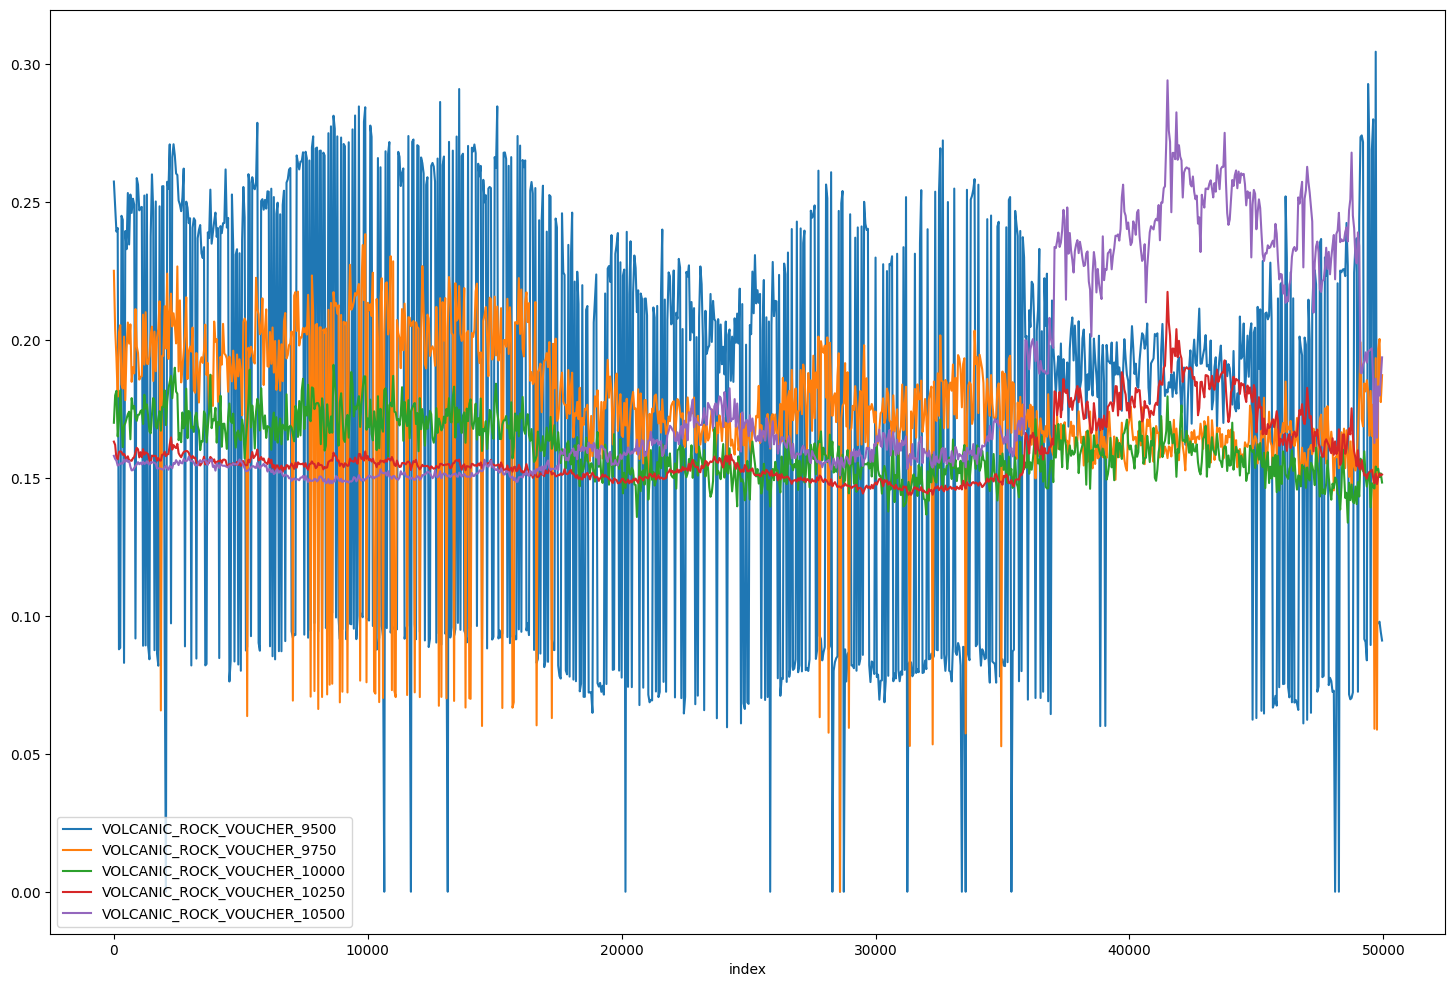

In [63]:
ticks = range(0, 50000, 50)
fig, ax = plt.subplots(figsize=(18,12))
for product in coupons:
    data[product]['IV'][ticks].plot(ax=ax,label=product)
plt.legend(loc='lower left')
'''
ax2 = ax.twinx()
data[VOR_C9500]['mid_price'][ticks].plot(color='g',ax=ax2)
ax3 = ax.twinx()
data[VOR]['mid_price'][ticks].plot(color='y',ax=ax3)
'''

<Axes: xlabel='index'>

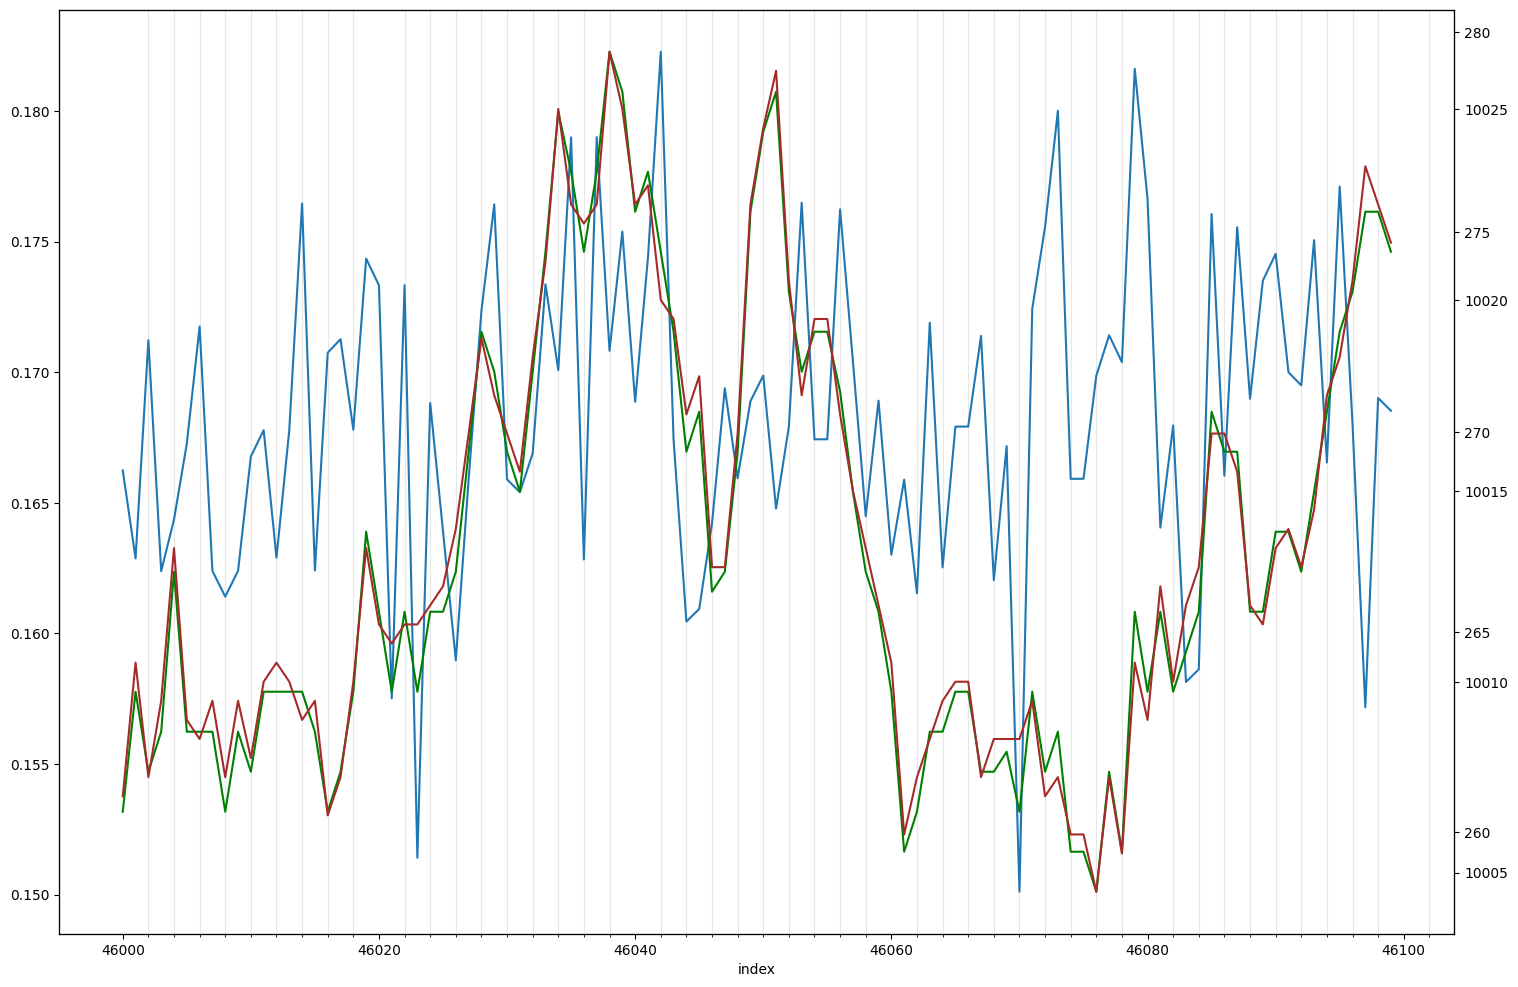

In [68]:
ticks = range(46000, 46100, 1)
fig, ax = plt.subplots(figsize=(18,12))
minor_ticks = np.arange(46000, 46500, 2)
ax.set_xticks(minor_ticks, minor=True)
minor_ticks = np.arange(0.0, 0.3, 0.005)
ax.set_yticks(minor_ticks, minor=True)

ax.grid(which='minor', alpha=0.3)

product = VOR_C9750
data[product]['IV'][ticks].plot(ax=ax,label=product)
ax2 = ax.twinx()
data[product]['mid_price'][ticks].plot(color='g',ax=ax2)
ax3 = ax.twinx()
data[VOR]['mid_price'][ticks].plot(color='brown', ax=ax3)

In [16]:
# basically, the spread for the vouchers is almost always 1, and not really any order depths...
def investigate_spread():
    for product in products:
        print(product, data[product]['bid_price_1'].isna().sum(), data[product]['ask_price_1'].isna().sum())
        print(data[product]['bid_volume_1'].sum(), data[product]['ask_volume_1'].sum())
    for product in products:
        print(product)
        spread = data[product]['ask_price_1'] - data[product]['bid_price_1']
        print(spread.describe())

In [171]:
window = 100
data[VOR]['vol'] = data[VOR]['mid_price'].pct_change().rolling(window).std() * (365**0.5)

C:\Users\Alex\AppData\Local\Temp\ipykernel_24292\3970377520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[VOR]['vol'] = data[VOR]['mid_price'].pct_change().rolling(window).std() * (365**0.5)


KeyError: 'vol'

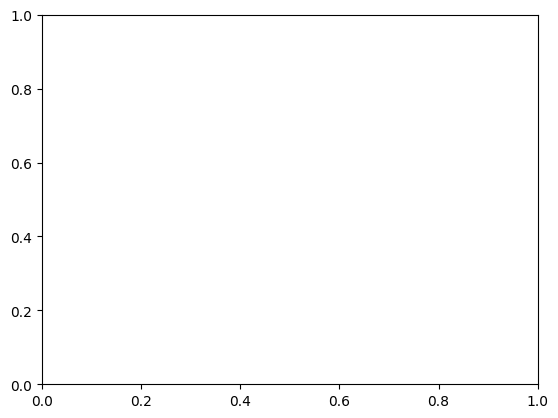

In [30]:
ticks = range(0,40000,100)

fig, ax = plt.subplots()
data[VOR]['vol'][ticks].plot(ax=ax,label=VOR)
for product in coupons:
    data[product]['IV'][ticks].plot(ax=ax,label=product)
plt.legend(loc='upper right')

In [187]:
# compute z score
window_size = 50
history = {}
for product in coupons:
    data[product]['z'] = (data[product]['IV'] - data[product]['IV'].rolling(window_size).mean()) / data[product]['IV'].rolling(window_size).std()

C:\Users\Alex\AppData\Local\Temp\ipykernel_24292\3426294910.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[product]['z'] = (data[product]['IV'] - data[product]['IV'].rolling(window_size).mean()) / data[product]['IV'].rolling(window_size).std()


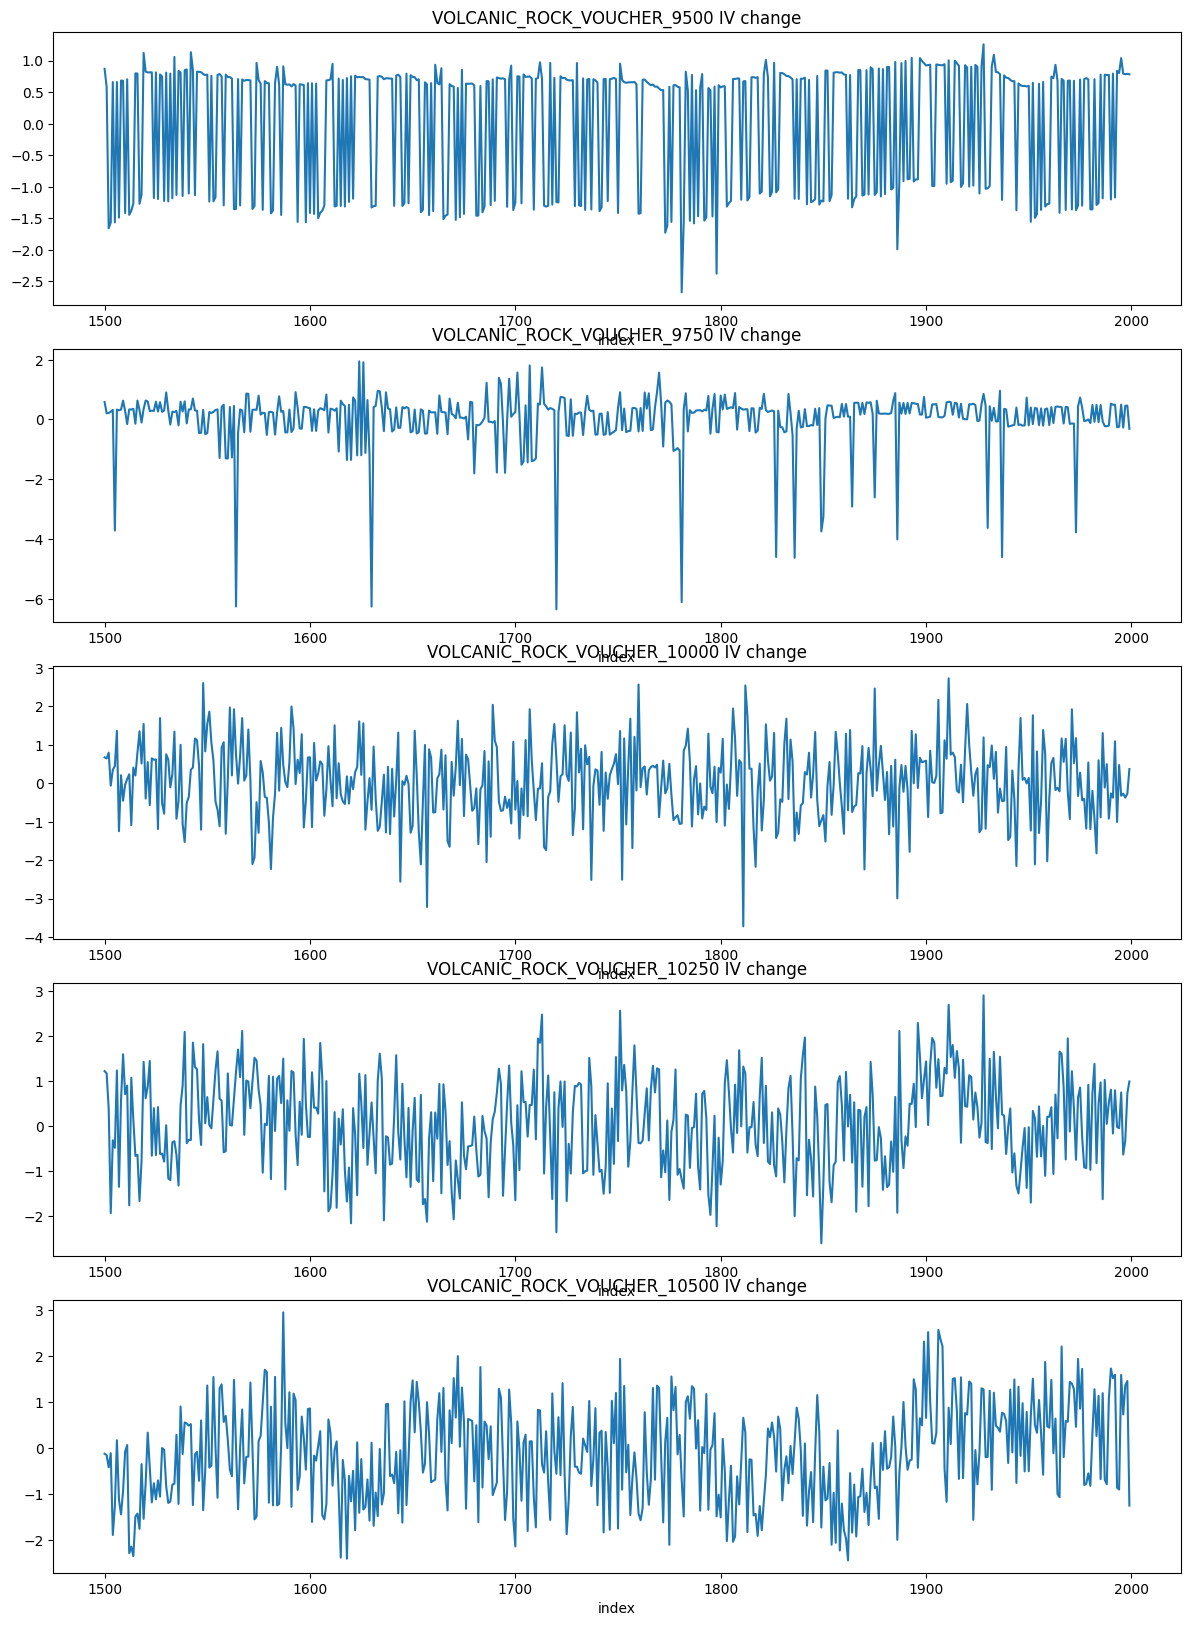

In [202]:
ticks = range(1500,2000)
fig, ax = plt.subplots(5,1,figsize=(12,16))
fig.tight_layout()
i=0
for product in coupons:
    data[product]['z'][ticks].plot(ax=ax[i])
    # ax2 = ax[i].twinx()
    # data[product]['IV'][ticks].plot(ax=ax2,color='g')
    ax[i].title.set_text(product + ' IV change')
    i += 1

<Axes: xlabel='index'>

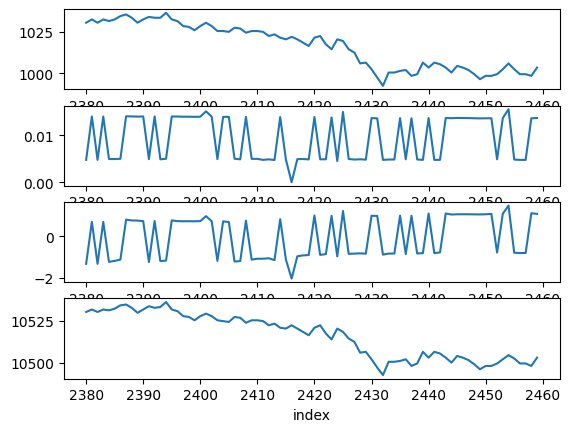

In [206]:
ticks = range(2380, 2460)

fig, ax = plt.subplots(4,1)
data[VOR]['mid_price'][ticks].plot(ax=ax[3])
data[VOR_C9500]['mid_price'][ticks].plot(ax=ax[0])
data[VOR_C9500]['IV'][ticks].plot(ax=ax[1])
data[VOR_C9500]['z'][ticks].plot(ax=ax[2])

In [207]:
print((data[VOR]['ask_price_1'] - data[VOR]['bid_price_1']).describe())

count    30000.000000
mean         1.492200
std          0.499947
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
dtype: float64


In [211]:
# investigate the parabolic fit algo
for product in coupons:
    data[product]['xi'] = data[VOR].apply(lambda x: \
                        np.log(data[VOR]['mid_price'].iloc[int(x['timestamp'] / 100)] / strikes[product]) / \
                        np.sqrt(timestamp_to_T(x['timestamp'])), axis=1)

C:\Users\Alex\AppData\Local\Temp\ipykernel_24292\1687356044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[product]['xi'] = data[VOR].apply(lambda x: \


In [269]:
polys = []
window_size = 5
for t in range(window_size):
    polys.append(np.poly1d([0,0,0]))
for t in range(window_size, 30000):
    x, y = [], []
    for product in coupons:
        x.extend(data[product]['xi'].iloc[t-window_size+1: t+1])
        y.extend(data[product]['IV'].iloc[t-window_size+1: t+1])
    coeffs = np.polyfit(x, y, 2)
    poly = np.poly1d(coeffs)
    polys.append(poly)

<Axes: >

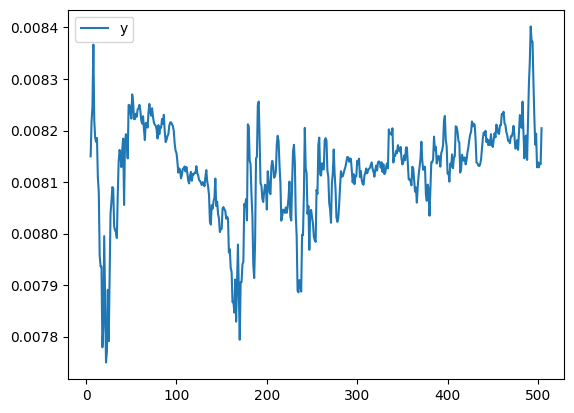

In [274]:
yyy = [polys[i](0) for i in range(30000)]
df_temp = pd.DataFrame({'y': yyy})
df_temp[window_size:500+window_size].plot()  # do mean reversion on this??

In [271]:
diffs = {}
for product in coupons:
    diffs[product] = pd.DataFrame({'diffs': [polys[i](data[product]['xi'].iloc[i])-\
                                             data[product]['IV'].iloc[i]\
                                             for i in range(30000)]})

<Axes: >

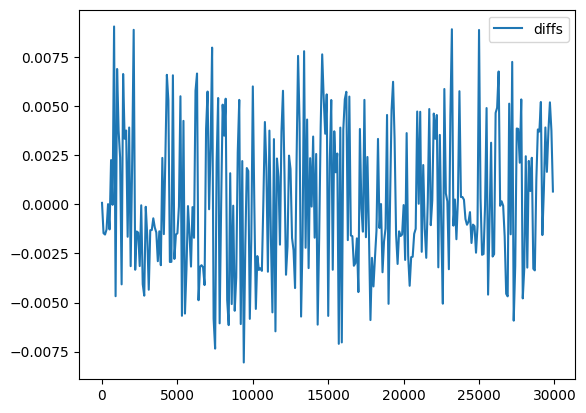

In [272]:
diffs[VOR_C9500][window_size::100].plot()

<Axes: xlabel='index'>

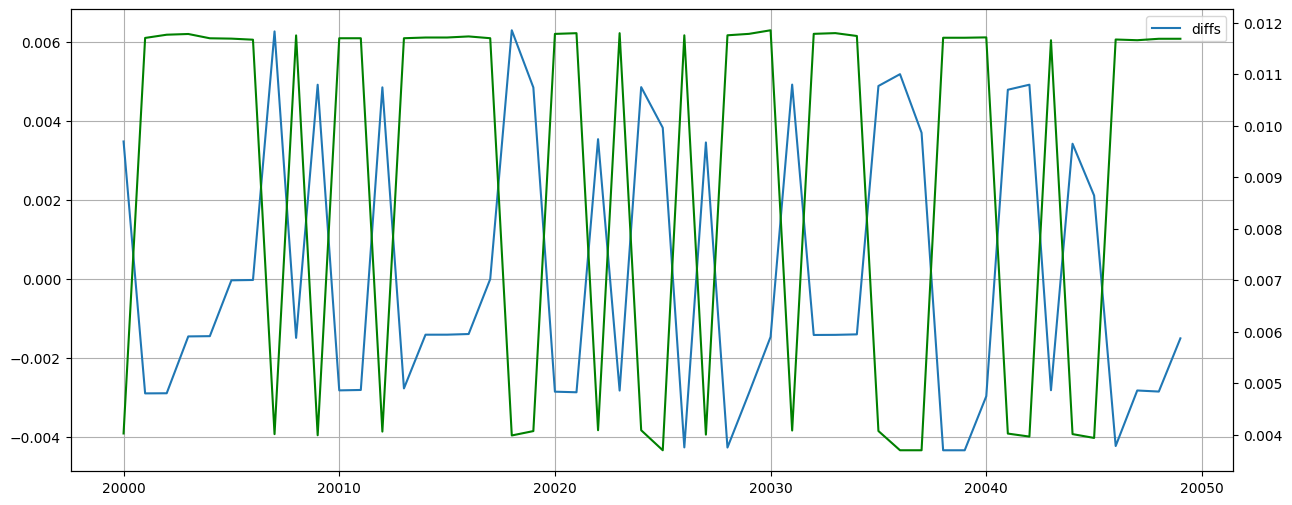

In [276]:
fig, ax = plt.subplots(figsize=(15,6))
x = 20000
product = VOR_C9500
diffs[product].iloc[x:50+x].plot(ax=ax)
ax.grid(True)
ax2 = ax.twinx()
data[product]['IV'].iloc[x:50+x].plot(color='g',ax=ax2)

index
0        0.013473
1        0.013553
2        0.013587
3        0.013638
4        0.013547
           ...   
29995    0.003812
29996    0.012046
29997    0.012046
29998    0.004042
29999    0.004110
Name: IV, Length: 30000, dtype: float64
